In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data_path = "/Users/michaelpatsais/Documents/Uni_work/machine_learning/Data/carvana.csv"
df = pd.read_csv(data_path)

In [5]:
# Cleaning data
features = df.drop("Price", axis = 1)
labels = df["Price"]

# ear data is messed up on some lines, 
for i, date in enumerate(features["Year"]):
    if date != 4:
        features.drop(features.index[i])

# need to turn car names into numeric data, y
car_names = features["Name"].unique()
car_map = {name : i for i, name in enumerate(car_names)}

features["Name"] = features["Name"].map(car_map)
print(features.tail())


       Name  Year  Miles
21995    32  2014  98085
21996   123  2016  62616
21997   136  2013  50345
21998   322  2020  27945
21999    26  2012  70676


In [32]:

x_train, x_test = np.array(train_test_split(features, test_size=0.5))
y_train, y_test = np.array(train_test_split(labels, test_size=0.5))

print(x_train, y_train)

[[    45   2012  80114]
 [   140  20204  64817]
 [    75   2021  45519]
 ...
 [    37   2018  72604]
 [    41   2012  48897]
 [    29   2012 100696]] [16990 22990 19590 ... 14590 21590 22990]


In [27]:

epochs = 50
batch_size = 25
dropout = 0.25
val_split = 0.5

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(64, activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "linear")
])

In [28]:
learning_rate = 0.0001
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer = optimizer, loss = loss_fn)

In [29]:
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = val_split)

Epoch 1/50
220/220 [==============================] - 1s 2ms/step - loss: 4799385088.0000 - val_loss: 2697217536.0000
Epoch 2/50
220/220 [==============================] - 0s 643us/step - loss: 1532395776.0000 - val_loss: 158515264.0000
Epoch 3/50
220/220 [==============================] - 0s 743us/step - loss: 1951343104.0000 - val_loss: 155243504.0000
Epoch 4/50
220/220 [==============================] - 0s 675us/step - loss: 657261440.0000 - val_loss: 170642144.0000
Epoch 5/50
220/220 [==============================] - 0s 643us/step - loss: 553569408.0000 - val_loss: 149035376.0000
Epoch 6/50
220/220 [==============================] - 0s 702us/step - loss: 560321344.0000 - val_loss: 135799888.0000
Epoch 7/50
220/220 [==============================] - 0s 928us/step - loss: 276116096.0000 - val_loss: 119725088.0000
Epoch 8/50
220/220 [==============================] - 0s 652us/step - loss: 276088832.0000 - val_loss: 131958440.0000
Epoch 9/50
220/220 [==============================] - 

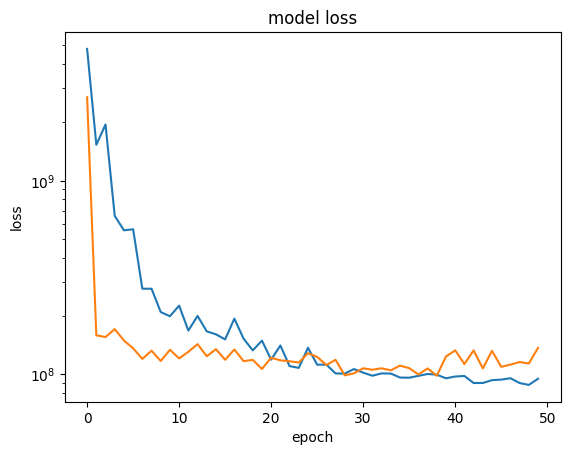

In [30]:
# plt.plot(history.history["accuracy"])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.yscale('log')
# plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.yscale('log')
plt.show()

In [31]:

y_pred= np.concatenate(model.predict(x_test))
print(y_pred.shape)
# print(y_test[:5], y_pred)
# work out accracy per perediction, and avg total accuracy
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})


pred_df["accuracy"] =  abs(pred_df["Difference"]/pred_df["Actual Value"]* 100)

print(pred_df)
print(np.average(pred_df["accuracy"]))

344/344 [==============================] - 0s 389us/step
(11000,)
       Actual Value  Predicted Value    Difference    accuracy
0             17590     -3974.839600  21564.839600  122.597155
1             12990     17958.876953  -4968.876953   38.251555
2             22590     14468.108398   8121.891602   35.953482
3             17590     15491.070312   2098.929688   11.932517
4             24990     -5337.424805  30327.424805  121.358243
...             ...              ...           ...         ...
10995         16990     16600.669922    389.330078    2.291525
10996         23590      5969.952637  17620.047363   74.692867
10997         14990     12963.122070   2026.877930   13.521534
10998         24990     15137.747070   9852.252930   39.424782
10999         23990     13345.919922  10644.080078   44.368821

[11000 rows x 4 columns]
33.99959789244069
